In [2]:
import scanpy as sc
import csv
import yaml
import re

# Load the processed data -- Load only the dataset you want to plot
adata = sc.read_h5ad('/Users/aumchampaneri/Databases/Mus musculus/Reference/Mm_MKA-pp.h5ad')  # Normal dataset

# Load the gene dictionary from the csv file
gene_dict = {}
with open('complement_gene_dictionary.csv', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        gene_dict[row[0]] = row[1]

# Extract keys and values into separate lists
gene_dict_names = list(gene_dict.keys())
gene_dict_keys = list(gene_dict.values())

# Change the name of some entries in gene_dict_names to fix plotting errors
gene_dict_names = [re.sub(r'\bC2\b', 'C2_ENSMUSG00000024371', name) for name in gene_dict_names]
gene_dict_names = [re.sub(r'\bC3\b', 'C3_ENSMUSG00000024164', name) for name in gene_dict_names]

# Load the tissue type dictionary from the yaml file
with open("Tissue Type Dictionary.yaml", "r") as file:
    cell_type_group = yaml.safe_load(file)

# Map cell types to groups
adata.obs['cell_type_group'] = 'Other'
for group, cell_types in cell_type_group.items():
    adata.obs.loc[adata.obs['cell_type'].isin(cell_types), 'cell_type_group'] = group

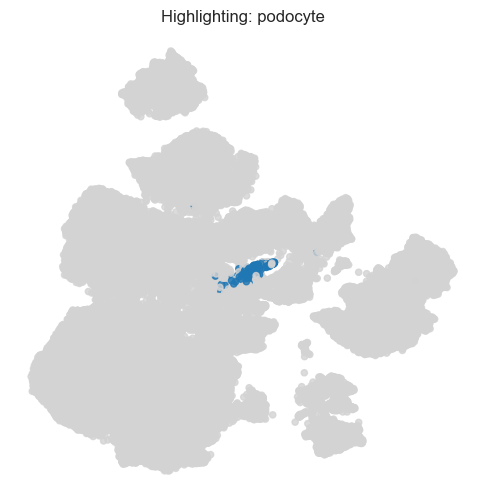

In [3]:
import matplotlib.pyplot as plt

# Grab UMAP coordinates
umap = adata.obsm['X_umap']
cell_types = adata.obs["cell_type"]

# Define your target cell type
target_cell_type = "podocyte"

# Build color list based on condition
colors = ["#1f77b4" if ct == target_cell_type else "lightgray" for ct in cell_types]

# Plot manually
plt.figure(figsize=(6, 6))
plt.scatter(umap[:, 0], umap[:, 1], c=colors, s=20, alpha=0.8)
plt.title(f"Highlighting: {target_cell_type}")
plt.axis("off")
plt.show()
